In [106]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

**(a)**
Write a Python program that constructs a $50 \times 50$ matrix `A = U*S*V`, where `U` and `V` are random orthogonal matrices and `S` is a diagonal matrix whose diagonal entries are random uniformly distributed numbers in $[0, 1]$, sorted into nonincreasing order. Have your program compute `[U2, S2, V2] = svd(A)` and the norms of `U - U2`, `V - V2`,  `S - S2`, and `A - U2 * S2 * V2`. Do this for five matrices $A$ and comment on the results. (Hint: Plots of `diag(U2.T @ U)` and `diag(V2.T @ V)` may be informative.)

In [146]:
def svd_experiment():
    # Function to execute the experiment outlined in Problem 16.2.a
    # Compute 50 x 50 random orthogonal matrices
    U, _ = np.linalg.qr(np.random.normal(0.0, 1.0, size=(50, 50)))
    V, _ = np.linalg.qr(np.random.normal(0.0, 1.0, size=(50, 50)))
    # Generate a diagonal matrix whose diagonal entries are uniform(0, 1) in nonincreasing order
    S = np.diag(( np.sort( np.random.uniform(0.0, 1.0, size=50) )[::-1]  ))
    # Compute A
    A = U @ S @ V
    # Compute matrices U2, S2, and V2 from A using numpy's svd
    U2, S2, V2 = np.linalg.svd(A)
    # Compute norms for comparison
    U_norm = np.linalg.norm(U - U2, ord=2)
    V_norm = np.linalg.norm(V - V2, ord=2)
    S_norm = np.linalg.norm(np.diag(S) - S2, ord=2)
    A_norm = np.linalg.norm(A - (U2 @ np.diag(S2) @ V2), ord=2)


    return U_norm, V_norm, S_norm, A_norm, A, U, U2, S, S2, V, V2

In [147]:
def format_svd_experiment_results(num_experiments):
    # Collect norm results into an array for analysis
    norm_dict = {'U_norm': [], 'V_norm': [], 'S_norm': [], 'A_norm': []}
    UTU_VTV_dict = {'UTU': [], 'VTV': []}
    matrix_dict = {'U2': [], 'V2': [], 'U': [], 'V': [], 'S': [], 'S2': [], 'A': []}
    for i in range(num_experiments):
        U_norm, V_norm, S_norm, A_norm, A, U, U2, S, S2, V, V2 = svd_experiment()
        matrix_dict['A'].append(A)
        matrix_dict['U'].append(U)
        matrix_dict['V'].append(V)
        matrix_dict['U2'].append(U2)
        matrix_dict['V2'].append(V2)
        matrix_dict['S'].append(np.diag(S))
        matrix_dict['S2'].append(S2)
        norm_dict['V_norm'].append(V_norm)
        norm_dict['U_norm'].append(U_norm)
        norm_dict['S_norm'].append(S_norm)
        norm_dict['A_norm'].append(A_norm)
        UTU_VTV_dict['UTU'].append(np.diag(U2.T @ U))
        UTU_VTV_dict['VTV'].append(np.diag(V2.T @ V))

    
    # Put norms into dataframe
    norm_df = pd.DataFrame.from_dict(norm_dict, dtype=np.float64)

    return norm_df, UTU_VTV_dict, matrix_dict

In [148]:
norm_df, UV_dict, matrix_dict = format_svd_experiment_results(5)

Below the values for the $U_{norm} = \begin{Vmatrix}U - U2\end{Vmatrix}$, $V_{norm} = \begin{Vmatrix}V - V2\end{Vmatrix}$, $S_{norm} = \begin{Vmatrix}S - S2\end{Vmatrix}$, and $A_{norm} = \begin{Vmatrix}A - A2\end{Vmatrix}$ are given for each of the 5 random $50 \times 50$ matrices. Note that the results look great for the norms of the final product. Although similar to the books example of QR, th comparison of U2 and U and V2 and V are not good.

In [172]:
norm_df

,U_norm,V_norm,S_norm,A_norm
0,2.0,2.0,2.089029e-15,4.761503e-15
1,2.0,2.0,1.903877e-15,2.242178e-15
2,2.0,2.0,2.582975e-15,3.163330e-15
3,2.0,2.0,2.037345e-15,3.003236e-15
4,2.0,2.0,2.062078e-15,3.668375e-15


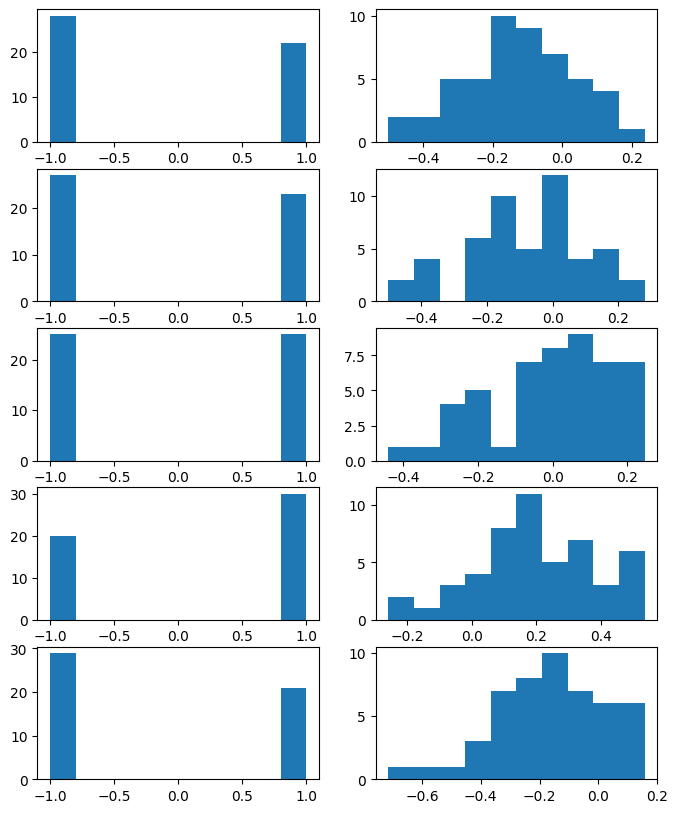

In [174]:
fig, ax = plt.subplots(5, 2, figsize=(8, 10))

UTU = UV_dict['UTU']
VTV = UV_dict['VTV']

ax[0, 0].hist(UTU[0])
ax[1, 0].hist(UTU[1])
ax[2, 0].hist(UTU[2])
ax[3, 0].hist(UTU[3])
ax[4, 0].hist(UTU[4])

ax[0, 1].hist(VTV[0])
ax[1, 1].hist(VTV[1])
ax[2, 1].hist(VTV[2])
ax[3, 1].hist(VTV[3])
ax[4, 1].hist(VTV[4])
plt.show()

**(b)**
Fix the signs in your computed $SVD$ so that the difficulties of (a) go away. Run the program again for five random matrices and comment on the various norms. Do they have a connection with `np.linalg.cond(A)`?

In [169]:
# Adjust the signs on U2 and V2 so that there are not so many negative values
def svd_experiment():
    # Function to execute the experiment outlined in Problem 16.2.a
    # Compute 50 x 50 random orthogonal matrices
    U, _ = np.linalg.qr(np.random.normal(0.0, 1.0, size=(50, 50)))
    V, _ = np.linalg.qr(np.random.normal(0.0, 1.0, size=(50, 50)))
    # Generate a diagonal matrix whose diagonal entries are uniform(0, 1) in nonincreasing order
    S = np.diag((np.sort(np.random.uniform(0.0, 1.0, size=50))[::-1]))
    # Compute A
    A = U @ S @ V
    # Compute matrices U2, S2, and V2 from A using numpy's svd
    U2, S2, V2 = np.linalg.svd(A)
    U2 = -U2
    V2 = -V2
    # Compute norms for comparison
    U_norm = np.linalg.norm(U - U2, ord=2.0)
    V_norm = np.linalg.norm(V - V2, ord=2.0)
    S_norm = np.linalg.norm(np.diag(S) - S2, ord=2.0)
    A_norm = np.linalg.norm(A - (U2 @ np.diag(S2) @ V2), ord=2.0)


    return U_norm, V_norm, S_norm, A_norm, A, U, U2, S, S2, V, V2

In [170]:
norm_df, UV_dict, matrix_dict = format_svd_experiment_results(5)

Below the values for the $U_{norm} = \begin{Vmatrix}U - U2\end{Vmatrix}$, $V_{norm} = \begin{Vmatrix}V - V2\end{Vmatrix}$, $S_{norm} = \begin{Vmatrix}S - S2\end{Vmatrix}$, and $A_{norm} = \begin{Vmatrix}A - A2\end{Vmatrix}$ are given for each of the 5 random $50 \times 50$ matrices. As I suspected, there is really no change compared to Part (a) when I switch the signs on both U and V. 

In [171]:
norm_df

,U_norm,V_norm,S_norm,A_norm
0,2.0,2.0,2.089029e-15,4.761503e-15
1,2.0,2.0,1.903877e-15,2.242178e-15
2,2.0,2.0,2.582975e-15,3.163330e-15
3,2.0,2.0,2.037345e-15,3.003236e-15
4,2.0,2.0,2.062078e-15,3.668375e-15


**(c)**
Replace the diagonal entries of `S` by their sixth powers and repeat (b). Do you see significant differences between the results of this exercise and those of the experiment for $QR$ factorization?

In [175]:
# Adjust the signs on U2 and V2 so that there are not so many negative values
def svd_experiment():
    # Function to execute the experiment outlined in Problem 16.2.a
    # Compute 50 x 50 random orthogonal matrices
    U, _ = np.linalg.qr(np.random.normal(0.0, 1.0, size=(50, 50)))
    V, _ = np.linalg.qr(np.random.normal(0.0, 1.0, size=(50, 50)))
    # Generate a diagonal matrix whose diagonal entries are uniform(0, 1) in nonincreasing order
    S = np.diag((np.sort(np.random.uniform(0.0, 1.0, size=50))[::-1])) ** 6
    # Compute A
    A = U @ S @ V
    # Compute matrices U2, S2, and V2 from A using numpy's svd
    U2, S2, V2 = np.linalg.svd(A)

    # Compute norms for comparison
    U_norm = np.linalg.norm(U - U2, ord=2.0)
    V_norm = np.linalg.norm(V - V2, ord=2.0)
    S_norm = np.linalg.norm(np.diag(S) - S2, ord=2.0)
    A_norm = np.linalg.norm(A - (U2 @ np.diag(S2) @ V2), ord=2.0)


    return U_norm, V_norm, S_norm, A_norm, A, U, U2, S, S2, V, V2

In [176]:
norm_df, UV_dict, matrix_dict = format_svd_experiment_results(5)

The only difference I am seeing between the SVD factorization here and the QR factorization example from the book is that the comparison between U, U2, and V, V2 are the same in each of Part (a), Part (b), and Part(c). Moreover, the error is quite large. It is surprising that the final product comes out within epsilon machine of the true result.

In [177]:
norm_df

,U_norm,V_norm,S_norm,A_norm
0,2.0,2.0,1.917769e-15,2.595188e-15
1,2.0,2.0,2.170821e-15,6.175800e-15
2,2.0,2.0,9.818437e-16,2.062343e-15
3,2.0,2.0,2.477993e-15,2.685253e-15
4,2.0,2.0,1.493614e-15,1.858533e-15
